In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from PIL import Image
%matplotlib inline

## Q1: Unit Norm Ball

### (a)

In [43]:
def plot_p_norm_unit_ball(p: float, lim = 2, N = 100):
    """
    Plots the ||.||p unit norm ball.

    Args:
        p: The norm to plot.
        lim: The axes limit to take for creating the meshgrid.
        N: The number of points to take for creating one dimension of the meshgrid.
    """
    spacing = 2 * lim / N
    x = [-lim + i * spacing for i in range(N+1)]
    y = [-lim + i * spacing for i in range(N+1)]
    for i in range(N+1):
        for j in range(N+1):
            if abs(x[i])**p + abs(y[j])**p <= 1:
                plt.plot(x[i], y[j], 'bo')
    # Draw x and y axis
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Unit norm ball for $p = {p}$')
    plt.show()

Test for p = 2

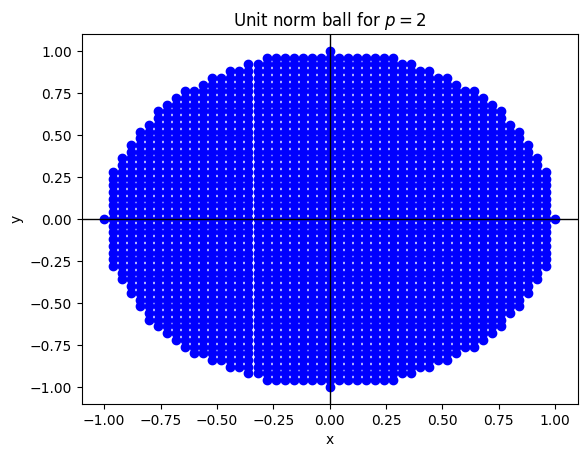

In [44]:
plot_p_norm_unit_ball(p = 2)

Test for p = 1

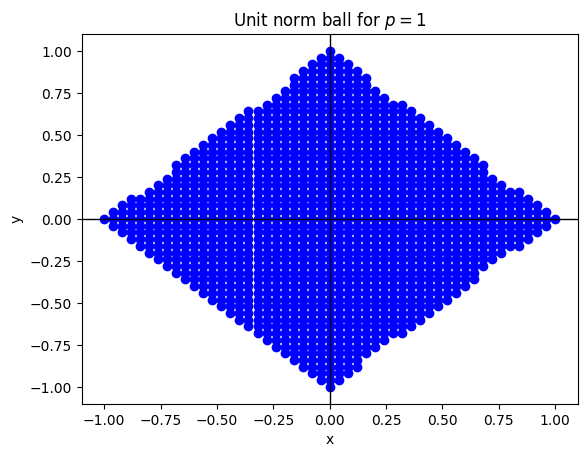

In [45]:
plot_p_norm_unit_ball(p = 1)

Test for p = 0.5

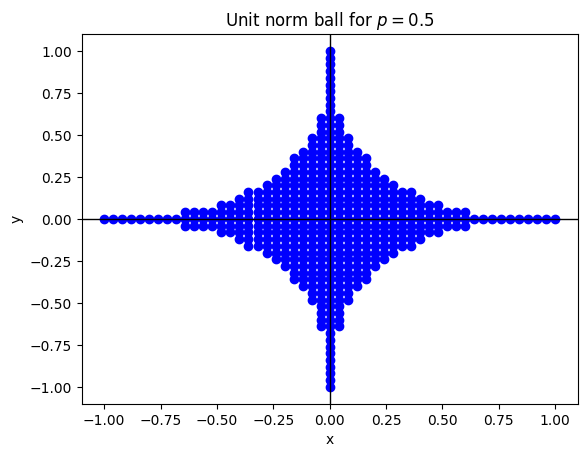

In [46]:
plot_p_norm_unit_ball(p = 0.5)

### (b)

When $p \geq 1$, the unit norm ball is convex as shown for $p = 2$ and $p = 1$.<br>
When $p < 1$, the unit norm ball is not convex as shown for $p = 0.5$.

## Q2: Completeness

To show that $C[0, 1]$ is incomplete with respect to $L1$ norm, we need to provide an example of a Cauchy sequence of continuous functions that does not converge to a continuous function.<br>
Consider the sequence of functions ${f_n}$ defined on interval $[0, 1]$ as follows:
$$
f_n(x) = \begin{cases}
1 & \text{if } 0 \leq x \leq \frac{1}{2} - \frac{1}{2n} \\
n(1-2x) & \text{if } \frac{1}{2} - \frac{1}{2n} < x \leq \frac{1}{2} \\
0 & \text{if } \frac{1}{2} < x \leq 1
\end{cases}
$$
Note that $f_n(x)$ is continuous for all $n \in \mathbb{N}$ and $x \in [0, 1]$.<br>
However, the limit function of this sequence is not continuous. The limit function is:
$$
f(x) = \begin{cases}
1 & \text{if } 0 \leq x \leq \frac{1}{2} \\
0 & \text{if } \frac{1}{2} < x \leq 1
\end{cases}
$$
$f(x)$ is not continuous at $x = \frac{1}{2}$, hence the sequence ${f_n}$ does not converge to a continuous function in $C[0, 1]$.<br>
This is demonstrated by the plot in the next cell.

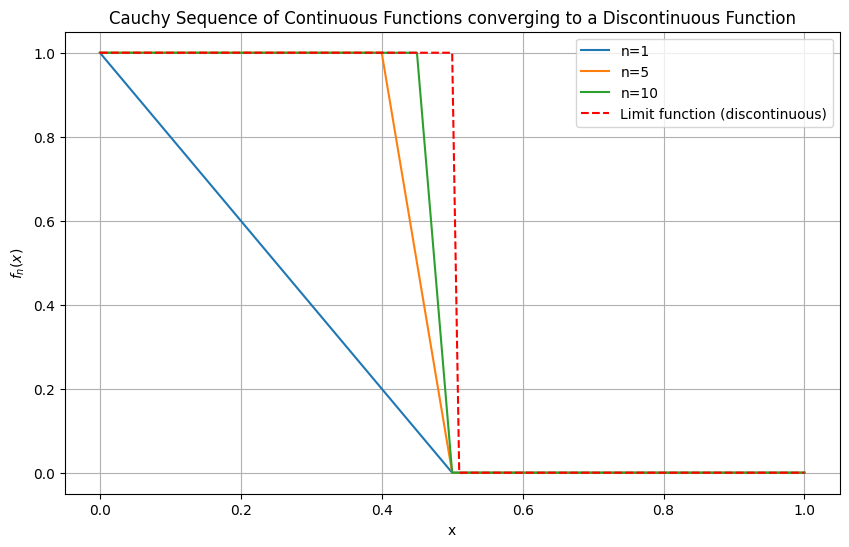

In [42]:
def f_n(x, n):
    if x <= 0.5 - 1/(2*n):
        return 1
    elif x <= 0.5:
        return n*(1 - 2*x)
    else:
        return 0

# Define the sequence of functions
n_values = [1, 5, 10]
x_values = [i * 0.01 for i in range(101)]

plt.figure(figsize=(10, 6))

for n in n_values:
    f_values = [f_n(x, n) for x in x_values]
    plt.plot(x_values, f_values, label=f'n={n}')

# Plotting the limit function
f_limit = [1 if x <= 0.5 else 0 for x in x_values]
plt.plot(x_values, f_limit, '--', label='Limit function (discontinuous)', color='red')

plt.title('Cauchy Sequence of Continuous Functions converging to a Discontinuous Function')
plt.xlabel('x')
plt.ylabel('$f_n(x)$')
plt.legend()
plt.grid()
plt.show()

## Q3: Entropy of a discrete RV

### (a)

In [6]:
def entropy_discrete_rv(pmf: List[float], zero_threshold = 1e-15):
    """
    Computes the entropy of a discrete random variable whose pmf is given.
    """
    entropy = 0.0
    for p in pmf:
        # Ignore zero probability events by using a zero threshold
        if abs(p) > zero_threshold:
            entropy -= p * np.log2(p)
    return entropy

### (b)

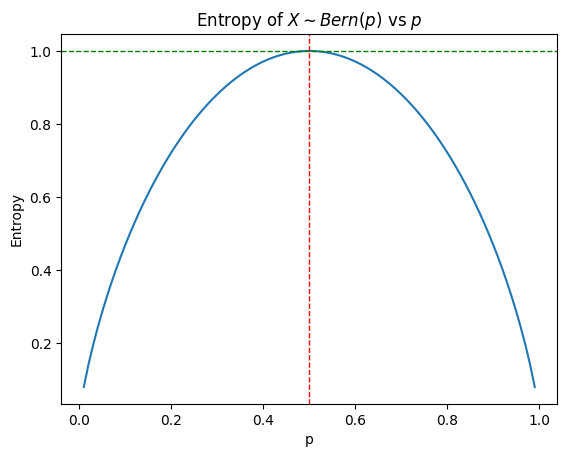

In [7]:
# Plot of X ~ Bern(p) vs p

# Consider p values from [0.01 to 0.99]
p_values = [0.01 * i for i in range(1, 100)]

# Compute the corresponding entropies
entropies = [entropy_discrete_rv([p, 1 - p]) for p in p_values]

plt.plot(p_values, entropies)
plt.xlabel('p')
plt.ylabel('Entropy')
plt.title('Entropy of $X \sim Bern(p)$ vs $p$')

# Draw the line x = 0.5
plt.axvline(0.5, color='red', lw=1, linestyle='--')

# Draw the line y = 1
plt.axhline(1, color='green', lw=1, linestyle='--')

plt.show()

Note that this plot attains its maximum value at $p = 0.5$. This is because the probability of success and failure are equal, and hence the entropy is maximized.

## Q4: Joint Entropy

**To Prove:** $H(X, Y) = H(X) + H(Y|X)$<br>
**Proof:**<br>
We know that
$$
H(X, Y) = -\sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log p(X = x, Y = y)
$$
Using $p(X = x, Y = y) = p(X = x) p(Y = y | X = x)$, we get:
$$
H(X, Y) = -\sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x) p(Y = y | X = x) (\log p(X = x) + \log p(Y = y | X = x))\\\\
\implies H(X, Y) = -\sum_{x \in \mathbf{X}} p(X = x) \sum_{y \in \mathbf{Y}} (p(Y = y | X = x) \log p(Y = y | X = x) + p(Y = y | X = x) \log p(X = x))\\\\
\implies H(X, Y) = -\sum_{x \in \mathbf{x}} p(X = x) \sum_{y \in \mathbf{Y}} p(Y = y | X = x) \log p(Y = y | X = x) - \sum_{x \in \mathbf{X}} p(X = x) \sum_{y \in \mathbf{Y}} p(Y = y | X = x) \log p(X = x)\\\\
$$
Now, we know that $\sum_{y \in \mathbf{Y}} p(Y = y | X = x) = 1$<br>
Therefore,
$$
H(X, Y) = H(Y | X) - \sum_{x \in \mathbf{X}} p(X = x) \log p(X = x)\\\\
\implies H(X, Y) = H(Y | X) + H(X)
$$
Hence, proved.

## Q5: Mutual information
**To Prove:** $I(X; Y) = H(X) - H(X | Y) = H(Y) - H(Y | X)$<br>
**Proof:**<br>
We know that
$$ I(X; Y) = \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log \frac{p(X = x, Y = y)}{p(X = x) p(Y = y)} $$
Using $\frac{p(X = x, Y = y)}{p(X = x)} =  p(Y = y | X = x)$, we get:
$$
I(X; Y) = \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log \frac{p(Y = y | X = x)}{p(Y = y)}\\\\
\implies I(X; Y) = \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) (\log p(Y = y | X = x) - \log p(Y = y))\\\\
\implies I(X; Y) = \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log p(Y = y | X = x) - \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log p(Y = y)\\\\
$$
Note that the first term is $-H(Y | X)$, therfore:
$$
I(X; Y) = - \sum_{x \in \mathbf{X}} \sum_{y \in \mathbf{Y}} p(X = x, Y = y) \log p(Y = y) - H(Y | X)\\\\
$$
Rewriting the summation, we get:
$$
I(X; Y) = -\sum_{y \in \mathbf{Y}} \log p(Y = y) \sum_{x \in \mathbf{X}} p(X = x, Y = y) - H(Y | X)\\\\
$$
Since $\sum_{x \in \mathbf{X}} p(X = x, Y = y) = p(Y = y)$, we get:
$$
I(X; Y) = -\sum_{y \in \mathbf{Y}} p(Y = y) \log p(Y = y) - H(Y | X)\\\\
\implies I(X; Y) = H(Y) - H(Y | X)
$$
Hence, proved.

## Q6: Numerical Exercise
**Given:** $p(X=0, Y=0) = p(X=0, Y=1) = p(X=1, Y=1) = 1/3, p(X=1, Y=0) = 0$
- **(a)**<br>
    Let's find the marginal probabilities of $X$ and $Y$:
    $$
    p(X = 0) = p(X = 0, Y = 0) + p(X = 0, Y = 1) = 1/3 + 1/3 = 2/3\\\\
    p(X = 1) = p(X = 1, Y = 0) + p(X = 1, Y = 1) = 0 + 1/3 = 1/3\\\\
    p(Y = 0) = p(X = 0, Y = 0) + p(X = 1, Y = 0) = 1/3 + 0 = 1/3\\\\
    p(Y = 1) = p(X = 0, Y = 1) + p(X = 1, Y = 1) = 1/3 + 1/3 = 2/3
    $$
    Therefore,
    $$
    H(X) = - (2/3) \log (2/3) - (1/3) \log (1/3) \approx 0.9183\\\\
    H(Y) = - (1/3) \log (1/3) - (2/3) \log (2/3) \approx 0.9183
    $$
- **(b)**<br>
    Let's find the conditional probabilities:
    $$
    p(Y = 0 | X = 0) = p(X = 0, Y = 0)/p(X = 0) = \frac{1/3}{2/3} = 1/2\\\\
    p(Y = 0 | X = 1) = p(X = 1, Y = 0)/p(X = 1) = \frac{0}{1/3} = 0\\\\
    p(Y = 1 | X = 0) = p(X = 0, Y = 1)/p(X = 0) = \frac{1/3}{2/3} = 1/2\\\\
    p(Y = 1 | X = 1) = p(X = 1, Y = 1)/p(X = 1) = \frac{1/3}{1/3} = 1\\\\
    p(X = 0 | Y = 0) = p(X = 0, Y = 0)/p(Y = 0) = \frac{1/3}{1/3} = 1\\\\
    p(X = 0 | Y = 1) = p(X = 0, Y = 1)/p(Y = 1) = \frac{1/3}{2/3} = 1/2\\\\
    p(X = 1 | Y = 0) = p(X = 1, Y = 0)/p(Y = 0) = \frac{0}{1/3} = 0\\\\
    p(X = 1 | Y = 1) = p(X = 1, Y = 1)/p(Y = 1) = \frac{1/3}{2/3} = 1/2
    $$
    Therefore,
    $$
    H(Y | X) = - (p(Y=0, X=0) \log P(Y=0 | X=0) + p(Y=0, X=1) \log P(Y=0 | X=1) + \\ p(Y=1, X=0) \log P(Y=1 | X=0) + p(Y=1, X=1) \log P(Y=1 | X=1))\\\\
    \implies H(Y | X) = - (1/3 \log 1/2 + 0 + 1/3 \log 1/2 + 1/3 \log 1) \approx 0.6667\\\\
    $$
    Similarly,
    $$
    H(X | Y) = - (1/3 \log 1 + 1/3 \log 1/2 + 0 + 1/3 \log 1/2) \approx 0.6667
    $$
- **(c)**<br>
    Joint entropy:
    $$
    H(X, Y) = - (1/3 \log 1/3 + 1/3 \log 1/3 + 1/3 \log 1/3 + 0) \approx 1.5849
    $$
- **(d)**<br>
    $$
    H(Y) - H(Y | X) = 0.9183 - 0.6667 = 0.2516
    $$
- **(e)**<br>
    We know that $I(X; Y) = H(X) - H(X | Y) = H(Y) - H(Y | X)$<br>
    Therefore,
    $$
    I(X; Y) = 0.2516
    $$

## Q7: Image Entropy

### (a)

In [15]:
def normalized_hist_of_img(img: np.ndarray):
    """
    Given an image, this function computes the normalized histogram of the image.
    A histogram means the count of each pixel value in the image.
    Normalized histogram is the histogram divided by the total number of pixels in the image.
    """
    pixels_list = img.flatten().tolist()

    # Count the number of pixels for each pixel value
    hist = [pixels_list.count(i) for i in range(256)]
    num_pixels = len(pixels_list)

    # Normalize the histogram
    norm_hist = [h / num_pixels for h in hist]
    return norm_hist

### (b)

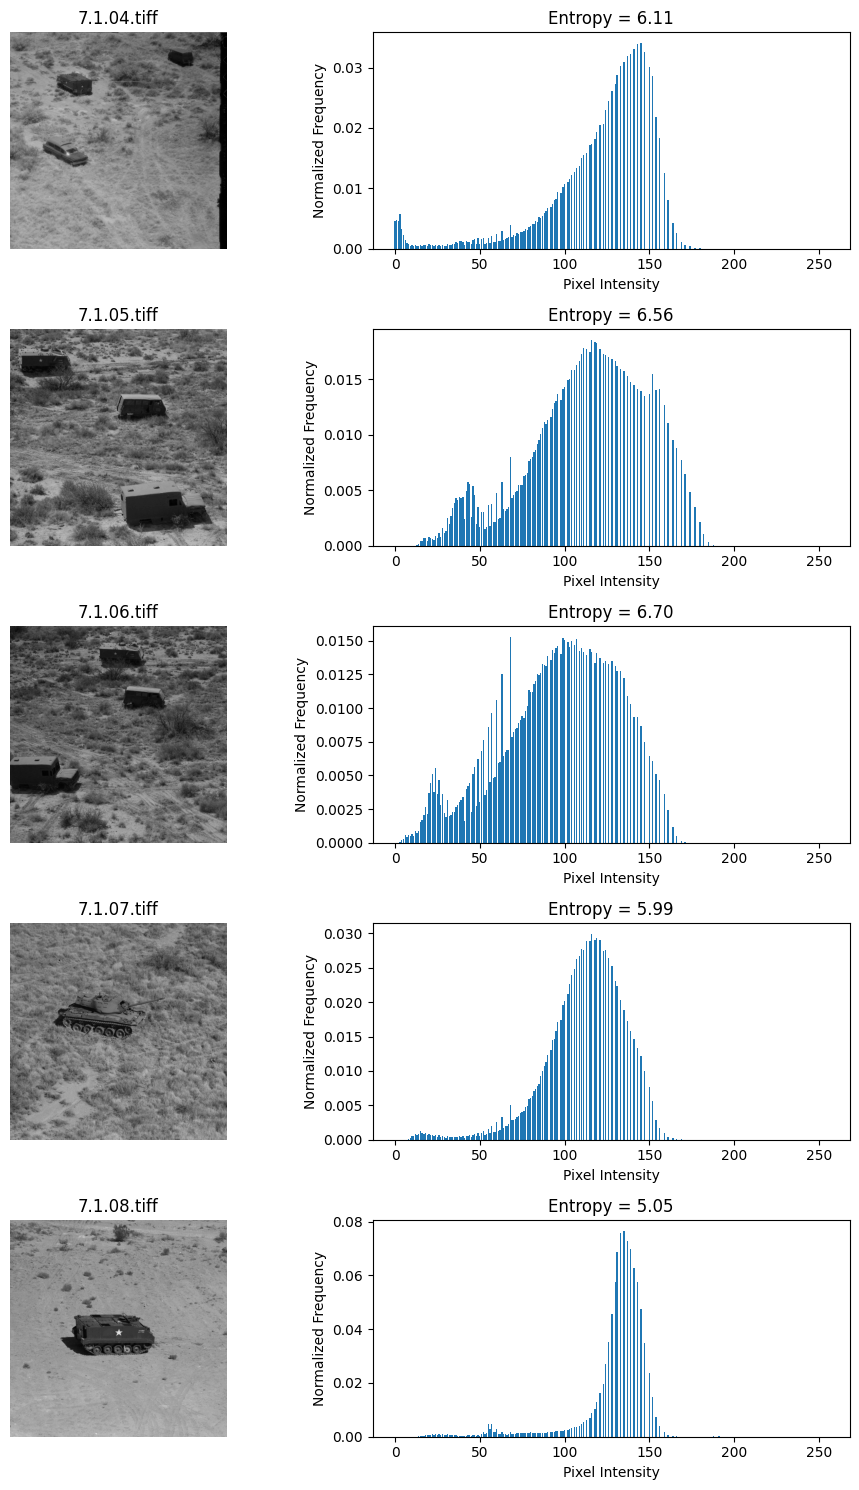

In [16]:
# Path of the images. You can change this to the path of your images.
GRAY_IMAGES_PATHS = [
    'misc/7.1.04.tiff',
    'misc/7.1.05.tiff',
    'misc/7.1.06.tiff',
    'misc/7.1.07.tiff',
    'misc/7.1.08.tiff'
]

# Plot the image and its histogram for each image
fig, ax = plt.subplots(len(GRAY_IMAGES_PATHS), 2, figsize=(10, 15))

for i, img_path in enumerate(GRAY_IMAGES_PATHS):
    # Load the image
    img = np.asarray(Image.open(img_path))
    ax[i, 0].imshow(img, cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(f'{img_path.split("/")[-1]}')

    # Compute the normalized histogram and entropy of the image
    norm_hist = normalized_hist_of_img(img)
    image_entropy = entropy_discrete_rv(norm_hist)

    # Plot the normalized histogram
    ax[i, 1].bar(range(256), norm_hist)
    ax[i, 1].set_title(f'Entropy = {image_entropy:.2f}')
    ax[i, 1].set_xlabel('Pixel Intensity')
    ax[i, 1].set_ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()

**Observations:**<br>It can be observed that the entropy of an image is lesser when the image has less variety of pixel values. This is because the entropy is a measure of uncertainty, and if the lesser the variety of pixel values, the lesser the uncertainty in the pixel values.<br><br>
On the other hand, if the image has a lot of variety of pixel values, the entropy is higher as there is more uncertainty in the pixel values.

## Q8: Joint PMF and Joint Entropy

### (a)

In [19]:
def norm_joint_histogram(img1: np.ndarray, img2: np.ndarray, cmap = 'jet'):
    """
    Returns the normalized joint histogram of the image pair and plot the joint histogram.
    A joint histogram is a 2-D histogram that represents the relationship between pixel intensities of two images.
    """

    assert img1.shape == img2.shape, "Both images should have the same shape."

    pixels_list_1 = img1.flatten().tolist()
    pixels_list_2 = img2.flatten().tolist()

    num_pixel_pairs = len(pixels_list_1)

    # Initialize the joint histogram with zeros
    hist = [[0 for _ in range(256)] for _ in range(256)]

    for i in range(num_pixel_pairs):
        pixel_val_1 = pixels_list_1[i]
        pixel_val_2 = pixels_list_2[i]
        hist[pixel_val_1][pixel_val_2] += 1

    # Normalize the joint histogram by dividing by the total number of pixel pairs
    norm_joint_hist = [[h / num_pixel_pairs for h in hist_row] for hist_row in hist]

    # Plot the normalized joint histogram
    plt.imshow(norm_joint_hist, cmap=cmap)
    plt.xlabel('Image 2 Pixel Intensity')
    plt.ylabel('Image 1 Pixel Intensity')
    plt.title('Normalized Joint Histogram')
    plt.colorbar()
    plt.show()

    return norm_joint_hist

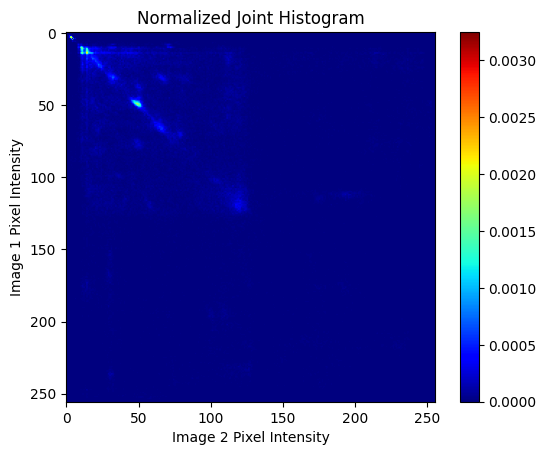

In [20]:
# Path of the images. You can change this to the path of your images.
LEFT_IMG_PATH = 'left.png'
RIGHT_IMG_PATH = 'right.png'

left_img = np.asarray(Image.open(LEFT_IMG_PATH))
right_img = np.asarray(Image.open(RIGHT_IMG_PATH))

norm_joint_hist = norm_joint_histogram(left_img, right_img)

### (b)

In [21]:
def joint_entropy(pmf_xy: List[List[float]], zero_threshold = 1e-15):
    """
    Returns the joint entropy of a pair of discrete random variables whose joint pmf is given.
    """
    entropy = 0.0
    for row in pmf_xy:
        for p in row:
            # Ignore zero probability events by using a zero threshold
            if abs(p) > zero_threshold:
                entropy -= p * np.log2(p)
    return entropy

### (c)

In [22]:
print(f'Joint Entropy of the normalized joint histogram: {joint_entropy(norm_joint_hist)}')

Joint Entropy of the normalized joint histogram: 13.675203263376206


## Q9: Conditional PMF and conditional entropy

### (a)

In [23]:
def conditional_pmf(pmf_xy: List[List[float]],
                    cond_index: int,
                    cond_value: int,
                    zero_threshold = 1e-15):
    """
    Returns the conditional pmf of a discrete random variable given the value of another discrete random variable.
    cond_index is the index of the random variable whose value is given (0 for horizontal axis, 1 for vertical axis).
    """
    if cond_index == 0:
        # Marginal pmf of the random variable whose value is given
        cond_value_slice = pmf_xy[cond_value]
    elif cond_index == 1:
        # Marginal pmf of the random variable whose value is given
        cond_value_slice = [pmf_xy[i][cond_value] for i in range(len(pmf_xy))]
    else:
        raise ValueError("cond_index should be 0 or 1.")
    
    # Normalize the slice by the marginal probability of the conditional variable
    marginal_cond_value = sum(cond_value_slice)

    if marginal_cond_value <= zero_threshold:
        raise ValueError("The marginal probability of the conditional variable is zero.")
    
    # Conditional pmf is the joint pmf divided by the marginal probability of the conditional variable at the given value
    conditional_pmf = [p / marginal_cond_value for p in cond_value_slice]

    return conditional_pmf

### (b)

In [24]:
def conditional_entropy(pmf_xy: List[List[float]],
                        cond_index: int,
                        zero_threshold = 1e-15):
    """
    Given the joint PMF of two discrete random variables and the index of one of the random variables, returns the conditional entropy.
    cond_index is the index of the random variable whose value is given (0 for horizontal axis, 1 for vertical axis).
    """
    entropy = 0.0

    for i in range(len(pmf_xy)):
        if cond_index == 0:
            marginal_p = sum(pmf_xy[i])
            # If the marginal probability is zero, ignore this event
            if marginal_p <= zero_threshold:
                continue

            cond_pmf = conditional_pmf(pmf_xy, cond_index, i, zero_threshold)

            entropy += marginal_p * entropy_discrete_rv(cond_pmf, zero_threshold)
        else:
            marginal_p = sum([pmf_xy[j][i] for j in range(len(pmf_xy))])
            # If the marginal probability is zero, ignore this event
            if marginal_p <= zero_threshold:
                continue

            cond_pmf = conditional_pmf(pmf_xy, cond_index, i, zero_threshold)

            entropy += marginal_p * entropy_discrete_rv(cond_pmf, zero_threshold)
    return entropy

### (c)

In [25]:
cond_entropy = conditional_entropy(norm_joint_hist, cond_index=0)
print(f'Conditional Entropy: {cond_entropy}')

Conditional Entropy: 6.416909158632363


## Q10: KL Divergence

### (a)

In [26]:
def kl_divergence(pmf_p: List[float], pmf_q: List[float], zero_threshold = 1e-15):
    """
    Returns the KL divergence between the distributions p and q i.e. D(p||q)
    """
    assert len(pmf_p) == len(pmf_q), "Both distributions should have the same length."

    divergence = 0.0

    for i in range(len(pmf_p)):
        # Ignore the zero probability events
        if pmf_q[i] <= zero_threshold or pmf_p[i] <= zero_threshold:
            continue

        divergence += pmf_p[i] * np.log2(pmf_p[i] / pmf_q[i])

    return divergence

### (b)
$p \sim Bern(r)$, $r = const.$<br>
$q \sim Bern(s)$

In [27]:
r = 0.5
pmf_p = [1-r, r]

#### (i)
Plot D(p||q), D(q||p)

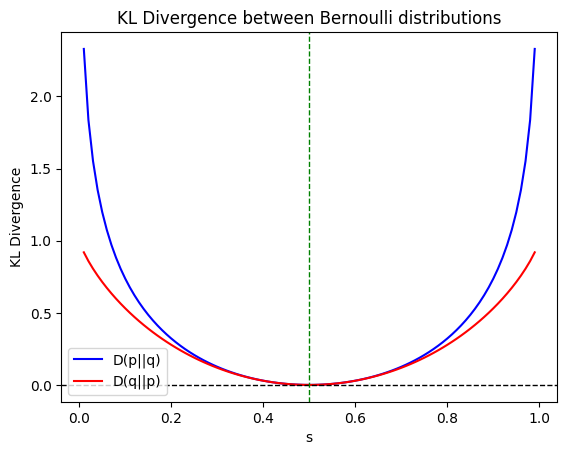

In [28]:
# Value of s from [0.01 to 0.99]
s_values = [0.01 * i for i in range(1, 100)]

# D(p||q)
d_pq_values = []
# D(q||p)
d_qp_values = []

for s in s_values:
    pmf_q = [1-s, s]
    d_pq = kl_divergence(pmf_p, pmf_q)
    d_qp = kl_divergence(pmf_q, pmf_p)

    d_pq_values.append(d_pq)
    d_qp_values.append(d_qp)

plt.plot(s_values, d_pq_values, label='D(p||q)', color='blue')
plt.plot(s_values, d_qp_values, label='D(q||p)', color='red')

# Plot y = 0
plt.axhline(0, color='black', lw=1, linestyle='--')

# Plot x = 0.5
plt.axvline(0.5, color='green', lw=1, linestyle='--')

plt.xlabel('s')
plt.ylabel('KL Divergence')
plt.title('KL Divergence between Bernoulli distributions')
plt.legend()
plt.show()

#### (ii)
It can be seen from the plot that $D(p || q) \geq 0$ and $D(q || p) \geq 0$

#### (iii)
It can be seen from the plot that $D(p || q) \neq D(q || p)$<br>
They are equal only when $s = r = 0.5$

#### (iv)

In [29]:
left_img_norm_hist = normalized_hist_of_img(left_img)
right_img_norm_hist = normalized_hist_of_img(right_img)

# D(left_img||right_img)
d_left_right = kl_divergence(left_img_norm_hist, right_img_norm_hist)
print(f'KL-Divergence(left || right): {d_left_right}')

# D(right_img||left_img)
d_right_left = kl_divergence(right_img_norm_hist, left_img_norm_hist)
print(f'KL-Divergence(right || left): {d_right_left}')

KL-Divergence(left || right): 0.015104015237387055
KL-Divergence(right || left): 0.014409785833354494


**Conclusion:** KL-Divergence is a good metric for image similarity. Since the `left.png` and `right.png` images are similar, the KL-Divergence between them is low.